<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Hands-on Lab : Web Scraping**


Estimated time needed: **30 to 45** minutes


## Objectives


In this lab you will perform the following:


* Extract information from a given web site 
* Write the scraped data into a csv file.


## Extract information from the given web site
You will extract the data from the below web site: <br> 


In [2]:
#this url contains the data you need to scrape
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/datasets/Programming_Languages.html"

The data you need to scrape is the **name of the programming language** and **average annual salary**.<br> It is a good idea to open the url in your web broswer and study the contents of the web page before you start to scrape.


Import the required libraries


In [1]:
# Your code here
from bs4 import BeautifulSoup
import requests
import pandas as pd
import matplotlib.pyplot as plt

Download the webpage at the url


In [3]:
#your code goes here
data = requests.get(url).text

Create a soup object
soup = BeautifulSoup(data, 'html')

In [4]:
#your code goes here
soup = BeautifulSoup(data, 'html')
table = soup.find('table')

Scrape the `Language name` and `annual average salary`.


In [5]:
#your code goes here
for row in table.find_all('tr'):
    cols = row.find_all('td')
    language_name = cols[1].getText()
    annual_avg_salary = cols[3].getText()
    print("{} ---> {}".format(language_name,annual_avg_salary))

Language ---> Average Annual Salary
Python ---> $114,383
Java ---> $101,013
R ---> $92,037
Javascript ---> $110,981
Swift ---> $130,801
C++ ---> $113,865
C# ---> $88,726
PHP ---> $84,727
SQL ---> $84,793
Go ---> $94,082


Save the scrapped data into a file named *popular-languages.csv*


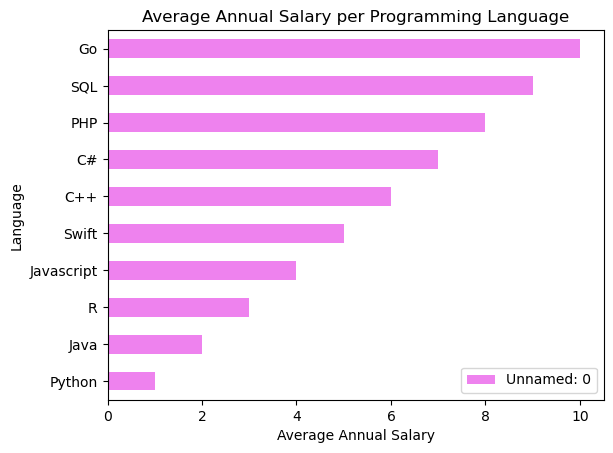

In [25]:
# your code goes here
rows = soup.find_all('tr')
df_data = []
for row in rows:
    table_data = row.find_all('td')
    r = [row.text for row in table_data]
    df_data.append(r)

df = pd.DataFrame(df_data, columns = ['No.', 'Language', 'Created By', 'Average Annual Salary', 'Learning Difficulty'])
df.drop(["No.","Created By","Learning Difficulty"], axis=1, inplace=True)
df.drop(df.index[0], inplace=True)
df.to_csv('popular-languages.csv')
#print(df.head())

df1 = pd.read_csv('popular-languages.csv')
df1.set_index('Language', inplace=True)
#print(df1.head())
df1.plot(kind='barh',color='violet')
plt.title('Average Annual Salary per Programming Language')
plt.xlabel('Average Annual Salary')
plt.ylabel('Language')
plt.show()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


|  Date (YYYY-MM-DD) |  Version | Changed By  |  Change Description |
|---|---|---|---|
| 2020-10-17  | 0.1  | Ramesh Sannareddy  |  Created initial version of the lab |


 Copyright &copy; 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2022-01-01).
